## Auto Regressive Models

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('airline-passenger-traffic.csv', header = None)
data.columns = ['Month','Passengers']
data['Month'] = pd.to_datetime(data['Month'], format='%Y-%m')
data = data.set_index('Month')
data.head(12)

,Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
1949-06-01,135.0
1949-07-01,148.0
1949-08-01,148.0
1949-09-01,136.0


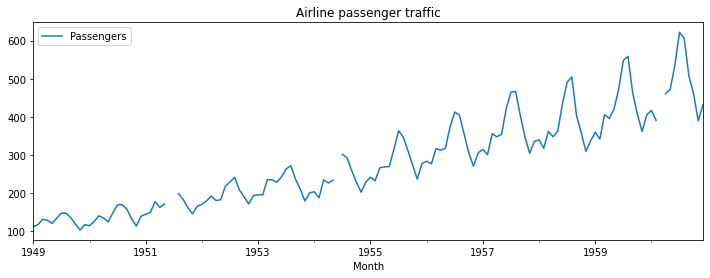

In [3]:
data.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Airline passenger traffic')
plt.show(block=False)

### Mean imputation

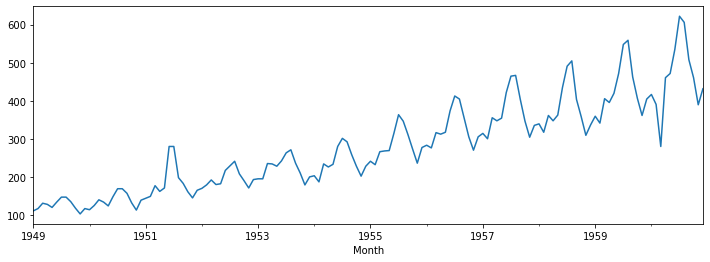

In [4]:
data = data.assign(passanger_value_imputation = data.Passengers.fillna(data.Passengers.mean()))
data.passanger_value_imputation.plot(figsize=(12,4))
plt.show()

### Linear imputation

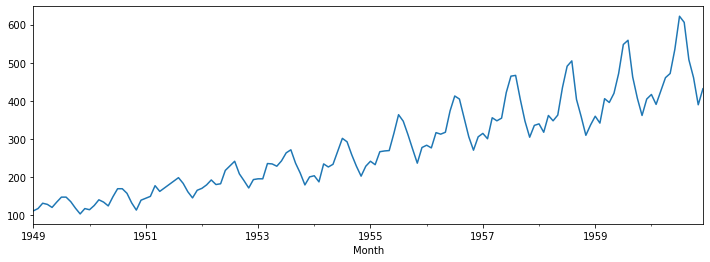

In [5]:
data = data.assign(passanger_value_imputation_linear = data.Passengers.fillna(data.Passengers.interpolate(method='linear')))
data.passanger_value_imputation_linear.plot(figsize=(12,4))
plt.show()

In [6]:
data.Passengers=data.passanger_value_imputation_linear
data.drop(['passanger_value_imputation','passanger_value_imputation_linear'],inplace=True,axis=1)
data

,Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
...,...
1960-08-01,606.0
1960-09-01,508.0
1960-10-01,461.0


### Outliers

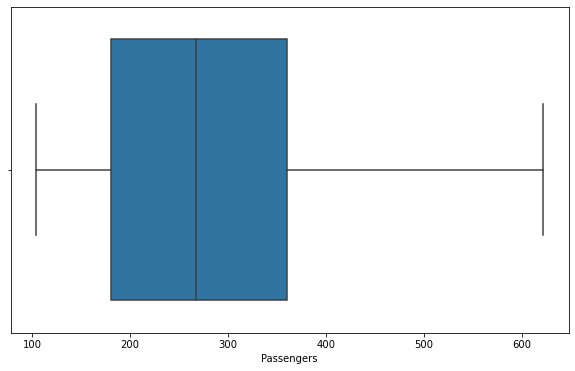

In [7]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data, x='Passengers',whis=1.5)
plt.show()

### Histogram plot

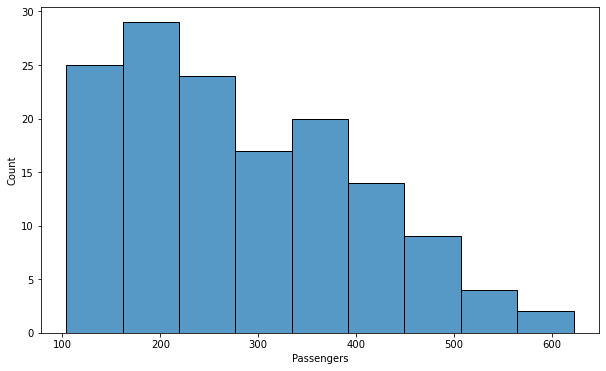

In [8]:
plt.figure(figsize=(10,6))
sns.histplot(data=data,x='Passengers')
plt.show()

## Time series Decomposition
### Additive seasonal decomposition

In [9]:
from pylab import rcParams
import statsmodels.api as sm

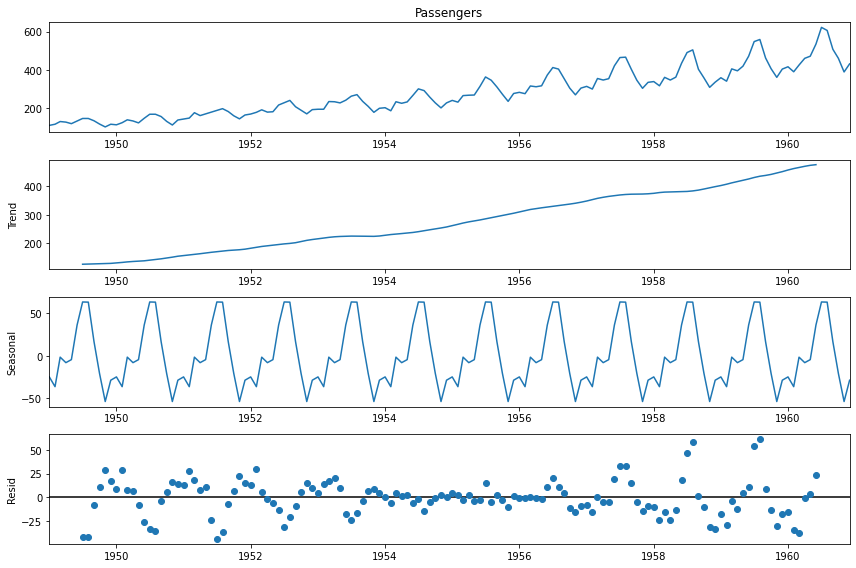

In [10]:
rcParams['figure.figsize'] = 12, 8
sm.tsa.seasonal_decompose(data.Passengers,model='additive').plot()
plt.show()

### Multiplicative seasonal decomposition

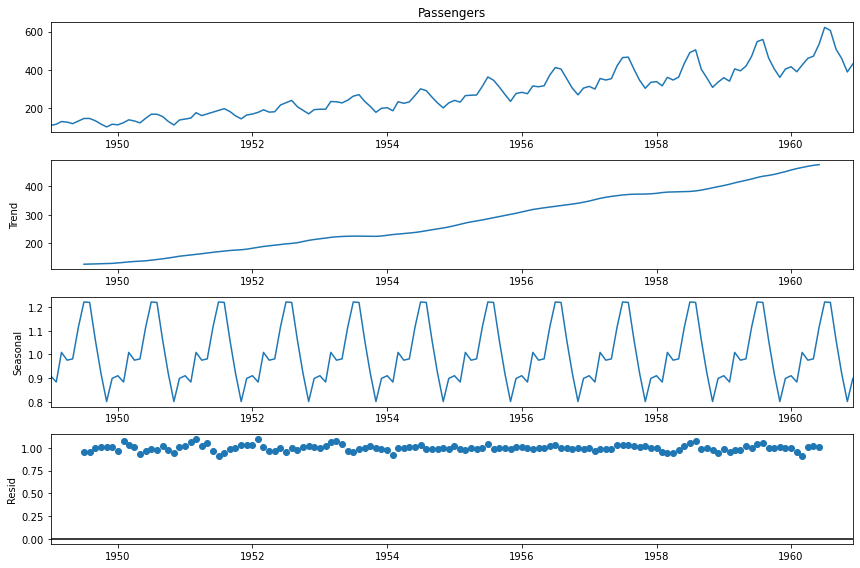

In [11]:
rcParams['figure.figsize'] = 12, 8
sm.tsa.seasonal_decompose(data.Passengers,model='multiplicative').plot()
plt.show()

## Build and evaluate time series forecast
### Split time series data into training and test set

In [12]:
len(data)

144

In [13]:
train_len = 120
train = data[0:train_len] # first 120 months as training set
test = data[train_len:] # last 24 months as out-of-time test set

### Simple time series methods
### Naive method : using the previous observation directly as the forecast without any change

In [14]:
train['Passengers'][train_len-1] 

337.0

In [15]:
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['Passengers'][train_len-1]

### Plot train and test forecast

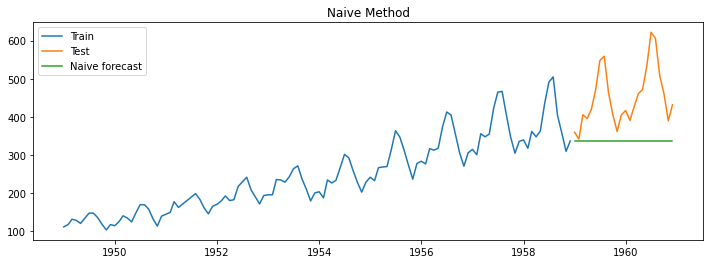

In [16]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

In [17]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_naive['naive_forecast'])/test['Passengers'])*100,2)

results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,137.51,23.63


### Simple average method

In [18]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Passengers'].mean()

In [19]:
y_hat_avg['avg_forecast'] 

Month
1959-01-01    245.891667
1959-02-01    245.891667
1959-03-01    245.891667
1959-04-01    245.891667
1959-05-01    245.891667
1959-06-01    245.891667
1959-07-01    245.891667
1959-08-01    245.891667
1959-09-01    245.891667
1959-10-01    245.891667
1959-11-01    245.891667
1959-12-01    245.891667
1960-01-01    245.891667
1960-02-01    245.891667
1960-03-01    245.891667
1960-04-01    245.891667
1960-05-01    245.891667
1960-06-01    245.891667
1960-07-01    245.891667
1960-08-01    245.891667
1960-09-01    245.891667
1960-10-01    245.891667
1960-11-01    245.891667
1960-12-01    245.891667
Name: avg_forecast, dtype: float64

#### Plot train, test and forecast

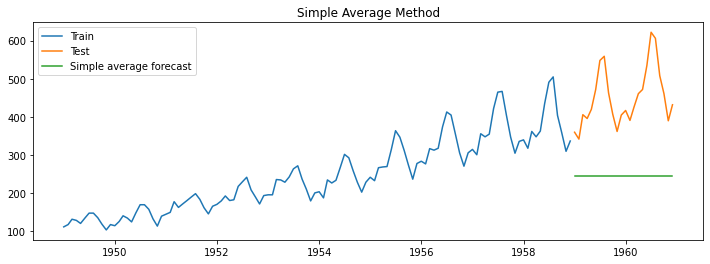

In [20]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.show()

In [21]:
tempResults = pd.DataFrame({'Method':['Simple average method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,137.51,23.63
0,Simple average method,137.51,23.63


### Simple moving average method
#### Moving averages are a simple and common type of smoothing used in time series analysis and time series forecasting. Calculating a moving average involves creating a new series where the values are comprised of the average of raw observations in the original time series.

In [22]:
y_hat_sma = data.copy()
ma_window = 12
y_hat_sma['sma_forecast'] = data['Passengers'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

In [23]:
y_hat_sma['sma_forecast'][train_len:] 

Month
1959-01-01    381.0
1959-02-01    381.0
1959-03-01    381.0
1959-04-01    381.0
1959-05-01    381.0
1959-06-01    381.0
1959-07-01    381.0
1959-08-01    381.0
1959-09-01    381.0
1959-10-01    381.0
1959-11-01    381.0
1959-12-01    381.0
1960-01-01    381.0
1960-02-01    381.0
1960-03-01    381.0
1960-04-01    381.0
1960-05-01    381.0
1960-06-01    381.0
1960-07-01    381.0
1960-08-01    381.0
1960-09-01    381.0
1960-10-01    381.0
1960-11-01    381.0
1960-12-01    381.0
Name: sma_forecast, dtype: float64

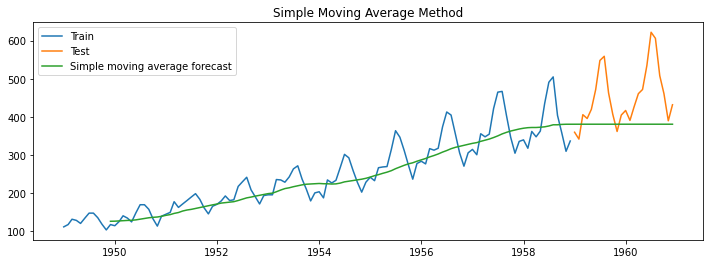

In [24]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

In [25]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_sma['sma_forecast'][train_len:])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple moving average forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,137.51,23.63
0,Simple average method,137.51,23.63
0,Simple moving average forecast,103.33,15.54


### Exponential smoothing methods
### Simple exponential smoothing : holtwinters

In [26]:
#Single Exponential Smoothing, SES for short, also called Simple Exponential Smoothing, 
# is a time series forecasting method for univariate data without a trend or seasonality. 
# It requires a single parameter, called alpha (a), also called the smoothing factor or smoothing coefficient

In [27]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [28]:
model = SimpleExpSmoothing(train['Passengers'])
model_fit = model.fit(smoothing_level=0.2,optimized=False)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(24)

E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


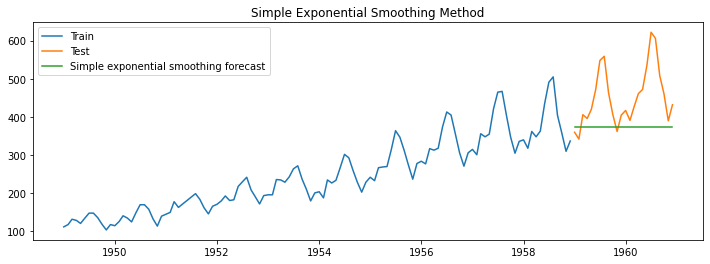

In [29]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()


##### This is a simple but Intuitive Method to calculate MAPE.
- Add all the absolute errors across all items, call this A.
- Add all the actual (or forecast) quantities across all items, call this B.
- Divide A by B.
- MAPE is the Sum of all Errors divided by the sum of Actual (or forecast)

In [30]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_ses['ses_forecast'])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple exponential smoothing forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive method,137.51,23.63
0,Simple average method,137.51,23.63
0,Simple moving average forecast,103.33,15.54
0,Simple exponential smoothing forecast,107.65,16.49


### Holtwinters : ExponentialSmoothing
- Exponential Smoothing: The Exponential Smoothing (ES) technique forecasts the next value using a weighted average of all previous values where the weights decay exponentially from the most recent to the oldest historical value. ... Holt ES can be used to forecast time series data that has a trend.

In [31]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [32]:
model = ExponentialSmoothing(np.asarray(train['Passengers']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.01, optimized=False)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.2, 'smoothing_trend': 0.01, 'smoothing_seasonal': None, 'damping_trend': nan, 'initial_level': 112.0, 'initial_trend': 6.0, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


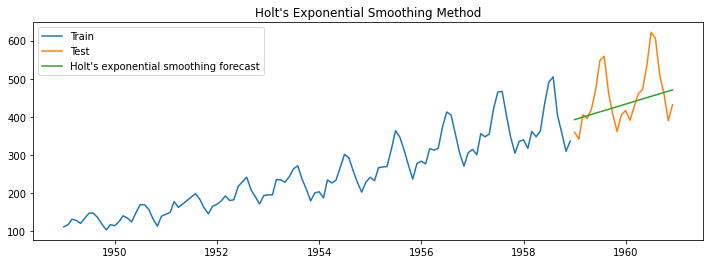

In [33]:
plt.figure(figsize=(12,4))
plt.plot( train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

In [34]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_holt['holt_forecast'])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,137.51,23.63
0,Simple average method,137.51,23.63
0,Simple moving average forecast,103.33,15.54
0,Simple exponential smoothing forecast,107.65,16.49
0,Holt's exponential smoothing method,71.94,11.11


### Holt Winters' additive method with trend and seasonality
-  Is an extension of Holt's exponential smoothing that captures seasonality. This method produces exponentially smoothed values for the level of the forecast, the trend of the forecast, and the seasonal adjustment to the forecast.

In [35]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['Passengers']) ,seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(24)

{'smoothing_level': 0.23615815135772011, 'smoothing_trend': 0.0, 'smoothing_seasonal': 0.7638418486422799, 'damping_trend': nan, 'initial_level': 204.98775010890893, 'initial_trend': 2.277125578879114, 'initial_seasons': array([ -95.26477839,  -89.72946402,  -77.22895316,  -82.34755114,
        -91.04048136,  -76.87513463,  -64.61027726,  -66.56007629,
        -80.69101219,  -99.57005515, -114.23801844,  -98.02808547]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


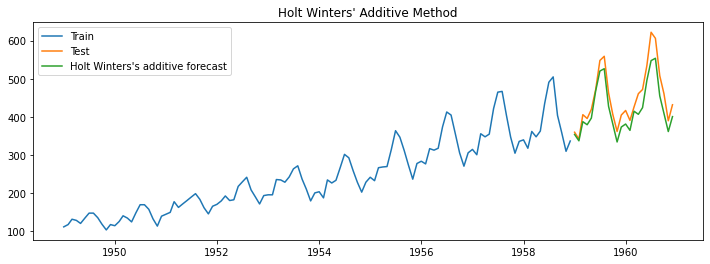

In [36]:
plt.figure(figsize=(12,4))
plt.plot( train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_hwa['hw_forecast'], label='Holt Winters\'s additive forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Additive Method')
plt.show()

In [37]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_hwa['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_hwa['hw_forecast'])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,137.51,23.63
0,Simple average method,137.51,23.63
0,Simple moving average forecast,103.33,15.54
0,Simple exponential smoothing forecast,107.65,16.49
0,Holt's exponential smoothing method,71.94,11.11
0,Holt Winters' additive method,35.86,6.72


### Holts multiplicative method

In [38]:
y_hat_hwm = test.copy()
model = ExponentialSmoothing(np.asarray(train['Passengers']) ,seasonal_periods=12 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm['hw_forecast'] = model_fit.forecast(24)

{'smoothing_level': 0.3655865614456789, 'smoothing_trend': 8.003382780364158e-08, 'smoothing_seasonal': 0.6344134168549864, 'damping_trend': nan, 'initial_level': 182.90595507171616, 'initial_trend': 3.9608579040286487, 'initial_seasons': array([0.59936353, 0.63043657, 0.69295765, 0.65877107, 0.60804705,
       0.664941  , 0.72308922, 0.71817668, 0.65513481, 0.57089973,
       0.50755226, 0.58555887]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


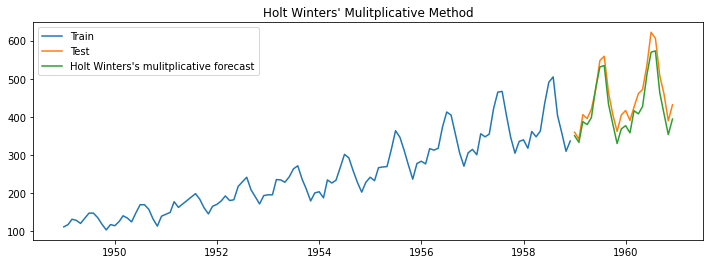

In [39]:
plt.figure(figsize=(12,4))
plt.plot( train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_hwm['hw_forecast'], label='Holt Winters\'s mulitplicative forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Mulitplicative Method')
plt.show()

In [40]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_hwm['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_hwm['hw_forecast'])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' multiplicative method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,137.51,23.63
0,Simple average method,137.51,23.63
0,Simple moving average forecast,103.33,15.54
0,Simple exponential smoothing forecast,107.65,16.49
0,Holt's exponential smoothing method,71.94,11.11
0,Holt Winters' additive method,35.86,6.72
0,Holt Winters' multiplicative method,32.46,6.45


## Auto Regressive methods
### Stationarity vs non-stationary time series

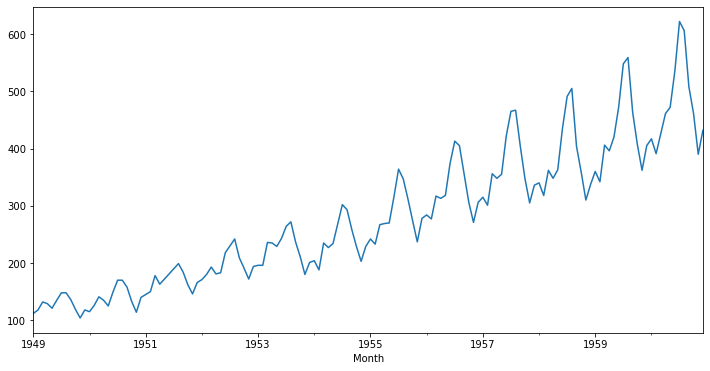

In [41]:
plt.figure(figsize=(12,6))
data.Passengers.plot()
plt.show()

### ADF Test - Augmented dicky fullter test to check time series is stationary or not

In [42]:
from statsmodels.tsa.stattools import adfuller

In [43]:
adf_test = adfuller(data.Passengers)
adf_test

(0.8946087940823843,
 0.9930195647605924,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 993.7736365973918)

In [44]:
print('adf_static ',adf_test[0])
print('critical_value 5% ',adf_test[4]['5%'])
print('p_value % ',adf_test[1])

adf_static  0.8946087940823843
critical_value 5%  -2.8840418343195267
p_value %  0.9930195647605924


### KPSS Test

In [45]:
from statsmodels.tsa.stattools import kpss

In [46]:
kpss_test = kpss(data.Passengers)
kpss_test

E:\Anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1874: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(warn_msg.format(direction="smaller"), InterpolationWarning)


(1.0520501504573108,
 0.01,
 14,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [47]:
print('kpss_static ',kpss_test[0])
print('critical_value 5% ',kpss_test[3]['5%'])
print('p_value % ',kpss_test[1])

kpss_static  1.0520501504573108
critical_value 5%  0.463
p_value %  0.01


## Echange rate data

In [48]:
df_exchange = pd.read_csv('exchange-rate.csv')
df_exchange.columns = ['Months','Exchange_Rate']
df_exchange.head()

,Months,Exchange_Rate
0,1,100.0
1,2,99.6
2,3,99.4
3,4,99.1
4,5,99.2


In [49]:
df_exchange.shape

(304, 2)

In [50]:
adf_test = adfuller(df_exchange.Exchange_Rate)
adf_test

(-0.8054678720541538,
 0.8175106426685049,
 0,
 303,
 {'1%': -3.4521175397304784,
  '5%': -2.8711265007266666,
  '10%': -2.571877823851692},
 1268.8696918056114)

In [51]:
print('adf_static ',adf_test[0])
print('critical_value 5% ',adf_test[4]['5%'])
print('p_value % ',adf_test[1])

adf_static  -0.8054678720541538
critical_value 5%  -2.8711265007266666
p_value %  0.8175106426685049


In [52]:
kpss_test=kpss(df_exchange.Exchange_Rate)
kpss_test

E:\Anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1874: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(warn_msg.format(direction="smaller"), InterpolationWarning)


(1.7258967599333663,
 0.01,
 16,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [53]:
print('adf_static ',kpss_test[0])
print('critical_value 5% ',kpss_test[3]['5%'])
print('p_value % ',kpss_test[1])

adf_static  1.7258967599333663
critical_value 5%  0.463
p_value %  0.01


### Coverting Non stationary to stationary 
- Approaches 
    - Differencing and 
    - Transformation


### Box Cox transformation

In [54]:
from scipy.stats import boxcox

In [55]:
df_exchange

,Months,Exchange_Rate
0,1,100.0
1,2,99.6
2,3,99.4
3,4,99.1
4,5,99.2
...,...,...
299,300,49.6
300,301,48.5
301,302,48.4
302,303,51.0


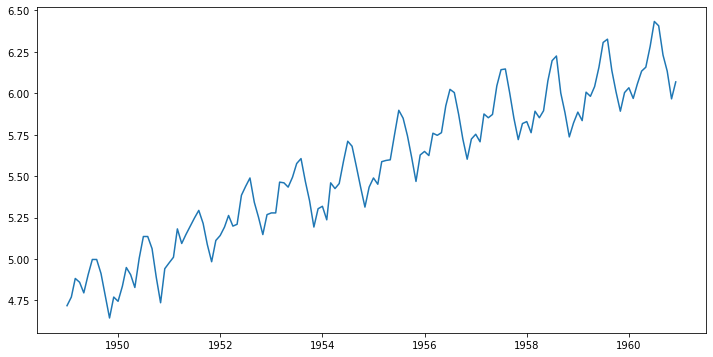

In [56]:
data_boxcox =  pd.Series(boxcox(data.Passengers,lmbda=0),index=data.index)

plt.figure(figsize=(12,6))
plt.plot(data_boxcox)

### Differencing

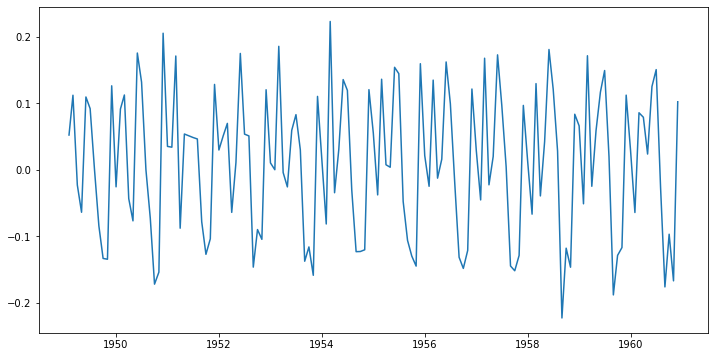

In [57]:
data_boxcox_diff =  pd.Series((data_boxcox-data_boxcox.shift()),index=data.index)
data_boxcox_diff.dropna(inplace=True)
plt.figure(figsize=(12,6))
plt.plot(data_boxcox_diff)

In [58]:
# adf_test # data is NOT stationary : H0 in case of ADF
adf_test = adfuller(data_boxcox_diff)
print('adf_static ',adf_test[0])
print('critical_value 5% ',adf_test[4]['5%'])
print('p_value % ',adf_test[1])
# kpss_static < critical_value means reject the H0 - that is data is non-stationary

adf_static  -3.2901138184594267
critical_value 5%  -2.8840418343195267
p_value %  0.015326212237943804


In [59]:
kpss_test=kpss(data_boxcox_diff) # data is stationary : H0 in case of KPSS
print('kpss_static ',kpss_test[0])
print('critical_value 5% ',kpss_test[3]['5%'])
print('p_value % ',kpss_test[1])

# p_value > critical_value means can't reject the H0 - that is data is stationary 

kpss_static  0.1018708149351519
critical_value 5%  0.463
p_value %  0.1


E:\Anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)


## Autocorrelaton Function - ACF Plot

In [60]:
from statsmodels.graphics.tsaplots import plot_acf

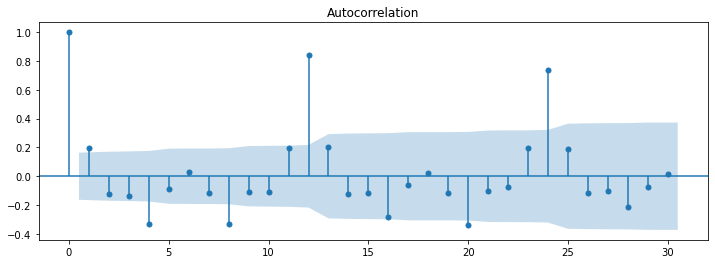

In [61]:
plt.figure(figsize=(12,4))
plot_acf(data_boxcox_diff, ax=plt.gca(),lags=30)
plt.show()

## Partial Autocorrelaton Function - PACF Plot

In [62]:
from statsmodels.graphics.tsaplots import plot_pacf

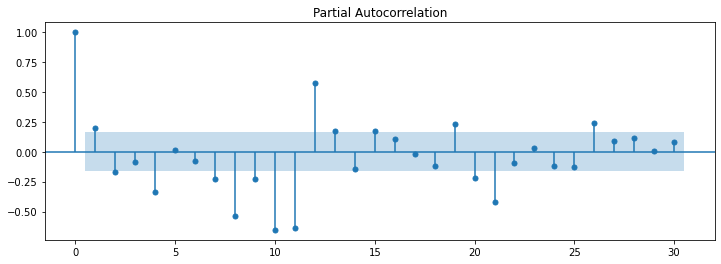

In [63]:
plt.figure(figsize=(12,4))
plot_pacf(data_boxcox_diff, ax=plt.gca(),lags=30)
plt.show()

### Split test and train

In [64]:
train_len

120

In [65]:
train_data_boxcox = data_boxcox[:train_len]
test_data_boxcox = data_boxcox[train_len:]
train_data_boxcox_diff = data_boxcox_diff[:train_len-1]
test_data_boxcox_diff = data_boxcox_diff[train_len-1:]

### ARIMA Model

In [66]:
from statsmodels.tsa.arima_model import ARIMA

In [67]:
model = ARIMA(train_data_boxcox_diff,order=(1,0,0))
model_fit = model.fit()
model_fit.params

E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


const      0.009477
ar.L1.y    0.183116
dtype: float64

In [68]:
#Recover original time series
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])

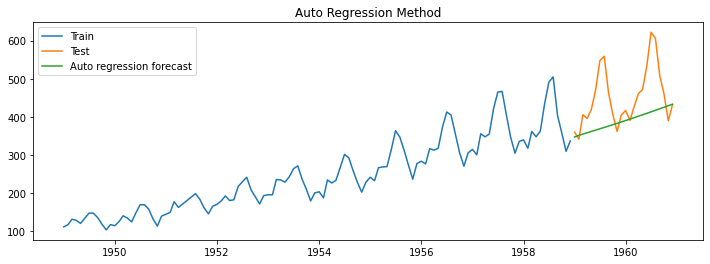

In [69]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_ar['ar_forecast'][test.index.min():], label='Auto regression forecast')
plt.legend(loc='best')
plt.title('Auto Regression Method')
plt.show()